In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import colorlover as cl
import plotly.io as pio
sb.set()
%matplotlib inline

# Data Cleaning
- Checking of null values
- Dropping of rows with null values

In [2]:
df = pd.read_csv('Datasets/data.csv')
change = pd.read_csv('Datasets/change.csv')

df.isnull().sum()

Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.88) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64

In [3]:
change.isnull().sum()

Country                        0
Changes in happiness scores    0
Whisker-high                   0
Whisker-low                    0
dtype: int64

In [4]:
codes = pd.read_csv('Datasets/country_codes.csv')
continentCodes = pd.read_csv('Datasets/continents.csv')
codes = codes.set_index("COUNTRY")
continentCodes = continentCodes.set_index("Country")
countryCodes = []
continents = []
histDF = pd.read_csv('Datasets/HistData.csv')

histDF = histDF.rename(columns={'Country name': 'Country', 'Log GDP per capita': 'Economy', 'Social support': 'Family', 'Healthy life expectancy at birth': 'Life expectancy', 'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Corruption', 'Life Ladder': 'Happiness score', })

histDF = histDF.replace('Taiwan Province of China', 'Taiwan')
histDF = histDF.replace('South Korea', 'Korea, South')
histDF = histDF.replace('North Korea', 'Korea, North')
histDF = histDF.replace('North Cyprus', 'Cyprus')
histDF = histDF.replace('Hong Kong S.A.R. of China', 'Hong Kong')
histDF = histDF.replace('Palestinian Territories', 'West Bank')
histDF = histDF.replace('Ivory Coast', 'Cote d\'Ivoire')
histDF = histDF.replace('Congo (Brazzaville)', 'Congo, Republic of the')
histDF = histDF.replace('Congo (Kinshasa)', 'Congo, Democratic Republic of the')
histDF = histDF.replace('Myanmar', 'Burma')
histDF = histDF.replace('Somaliland region', 'Somalia')
histDF = histDF.replace({'&': 'and'}, regex=True)

for row in histDF['Country']:
    continents.append(continentCodes.loc[row, 'Continent'])

for row in histDF['Country']:
    countryCodes.append(codes.loc[row, 'CODE'])

histDF['Continent'] = continents
histDF['Country Code'] = countryCodes

df_2018 = histDF[histDF['Year'] == 2018]
histDF = histDF[histDF['Year'] != 2018]
columns = ['Economy', 'Family', 'Life expectancy', 'Freedom', 'Generosity', 'Corruption', 'Happiness score', 'Continent']
histDF = histDF[['Economy', 'Family', 'Life expectancy', 'Freedom', 'Generosity', 'Corruption', 'Happiness score', 'Continent', 'Year', 'Country']]
df_2018 = histDF[columns]

histDF = histDF.dropna(how='any',axis=0)

# Preparing the Dataset

- Renaming columns to shorter names
- Standardising of country names
- Adding of 'Continent' and 'Country Code' columns

In [5]:
countryCodes = []
continents = []

df = df.rename(columns={'Explained by: GDP per capita': 'Economy', 'Explained by: Social support': 'Family', 'Explained by: Healthy life expectancy': 'Life expectancy', 'Explained by: Freedom to make life choices': 'Freedom', 'Explained by: Generosity': 'Generosity', 'Explained by: Perceptions of corruption': 'Corruption', 'Dystopia (1.88) + residual': 'Dystopia'})

df = df.replace('Taiwan Province of China', 'Taiwan')
df = df.replace('South Korea', 'Korea, South')
df = df.replace('North Korea', 'Korea, North')
df = df.replace('North Cyprus', 'Cyprus')
df = df.replace('Hong Kong S.A.R. of China', 'Hong Kong')
df = df.replace('Palestinian Territories', 'West Bank')
df = df.replace('Ivory Coast', 'Cote d\'Ivoire')
df = df.replace('Congo (Brazzaville)', 'Congo, Republic of the')
df = df.replace('Congo (Kinshasa)', 'Congo, Democratic Republic of the')
df = df.replace('Myanmar', 'Burma')
df = df.replace({'&': 'and'}, regex=True)

for row in df['Country']:
    continents.append(continentCodes.loc[row, 'Continent'])

for row in df['Country']:
    countryCodes.append(codes.loc[row, 'CODE'])

df['Continent'] = continents
df['Country Code'] = countryCodes

df.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia,Economy,Family,Life expectancy,Freedom,Generosity,Corruption,Continent,Country Code
0,Finland,7.769,7.830,7.708,2.714,1.340,1.587,0.986,0.596,0.153,0.393,Europe,FIN
1,Denmark,7.600,7.667,7.534,2.393,1.383,1.573,0.996,0.592,0.252,0.410,Europe,DNK
2,Norway,7.554,7.616,7.492,2.241,1.488,1.582,1.028,0.603,0.271,0.341,Europe,NOR
3,Iceland,7.494,7.613,7.374,2.401,1.380,1.624,1.026,0.591,0.354,0.118,Europe,ISL
4,Netherlands,7.488,7.542,7.433,2.393,1.396,1.522,0.999,0.557,0.322,0.298,Europe,NLD


In [6]:
countryCodes = []
continents = []

change = change.rename(columns={'Explained by: GDP per capita': 'Economy', 'Explained by: Social support': 'Family', 'Explained by: Healthy life expectancy': 'Life expectancy', 'Explained by: Freedom to make life choices': 'Freedom', 'Explained by: Generosity': 'Generosity', 'Explained by: Perceptions of corruption': 'Corruption', 'Dystopia (1.88) + residual': 'Dystopia'})

change = change.replace('Taiwan Province of China', 'Taiwan')
change = change.replace('South Korea', 'Korea, South')
change = change.replace('North Korea', 'Korea, North')
change = change.replace('North Cyprus', 'Cyprus')
change = change.replace('Hong Kong S.A.R. of China', 'Hong Kong')
change = change.replace('Palestinian Territories', 'West Bank')
change = change.replace('Ivory Coast', 'Cote d\'Ivoire')
change = change.replace('Congo (Brazzaville)', 'Congo, Republic of the')
change = change.replace('Congo (Kinshasa)', 'Congo, Democratic Republic of the')
change = change.replace('Myanmar', 'Burma')
change = change.replace({'&': 'and'}, regex=True)

for row in change['Country']:
    continents.append(continentCodes.loc[row, 'Continent'])

for row in change['Country']:
    countryCodes.append(codes.loc[row, 'CODE'])

change['Continent'] = continents
change['Country Code'] = countryCodes
change.head()

,Country,Changes in happiness scores,Whisker-high,Whisker-low,Continent,Country Code
0,Benin,1.390,1.555,1.225,Africa,BEN
1,Nicaragua,1.264,1.426,1.101,North America,NIC
2,Bulgaria,1.167,1.325,1.009,Europe,BGR
3,Latvia,1.159,1.258,1.059,Europe,LVA
4,Togo,1.077,1.225,0.930,Africa,TGO


# Exploratory Data Analysis

### Overall Heatmap

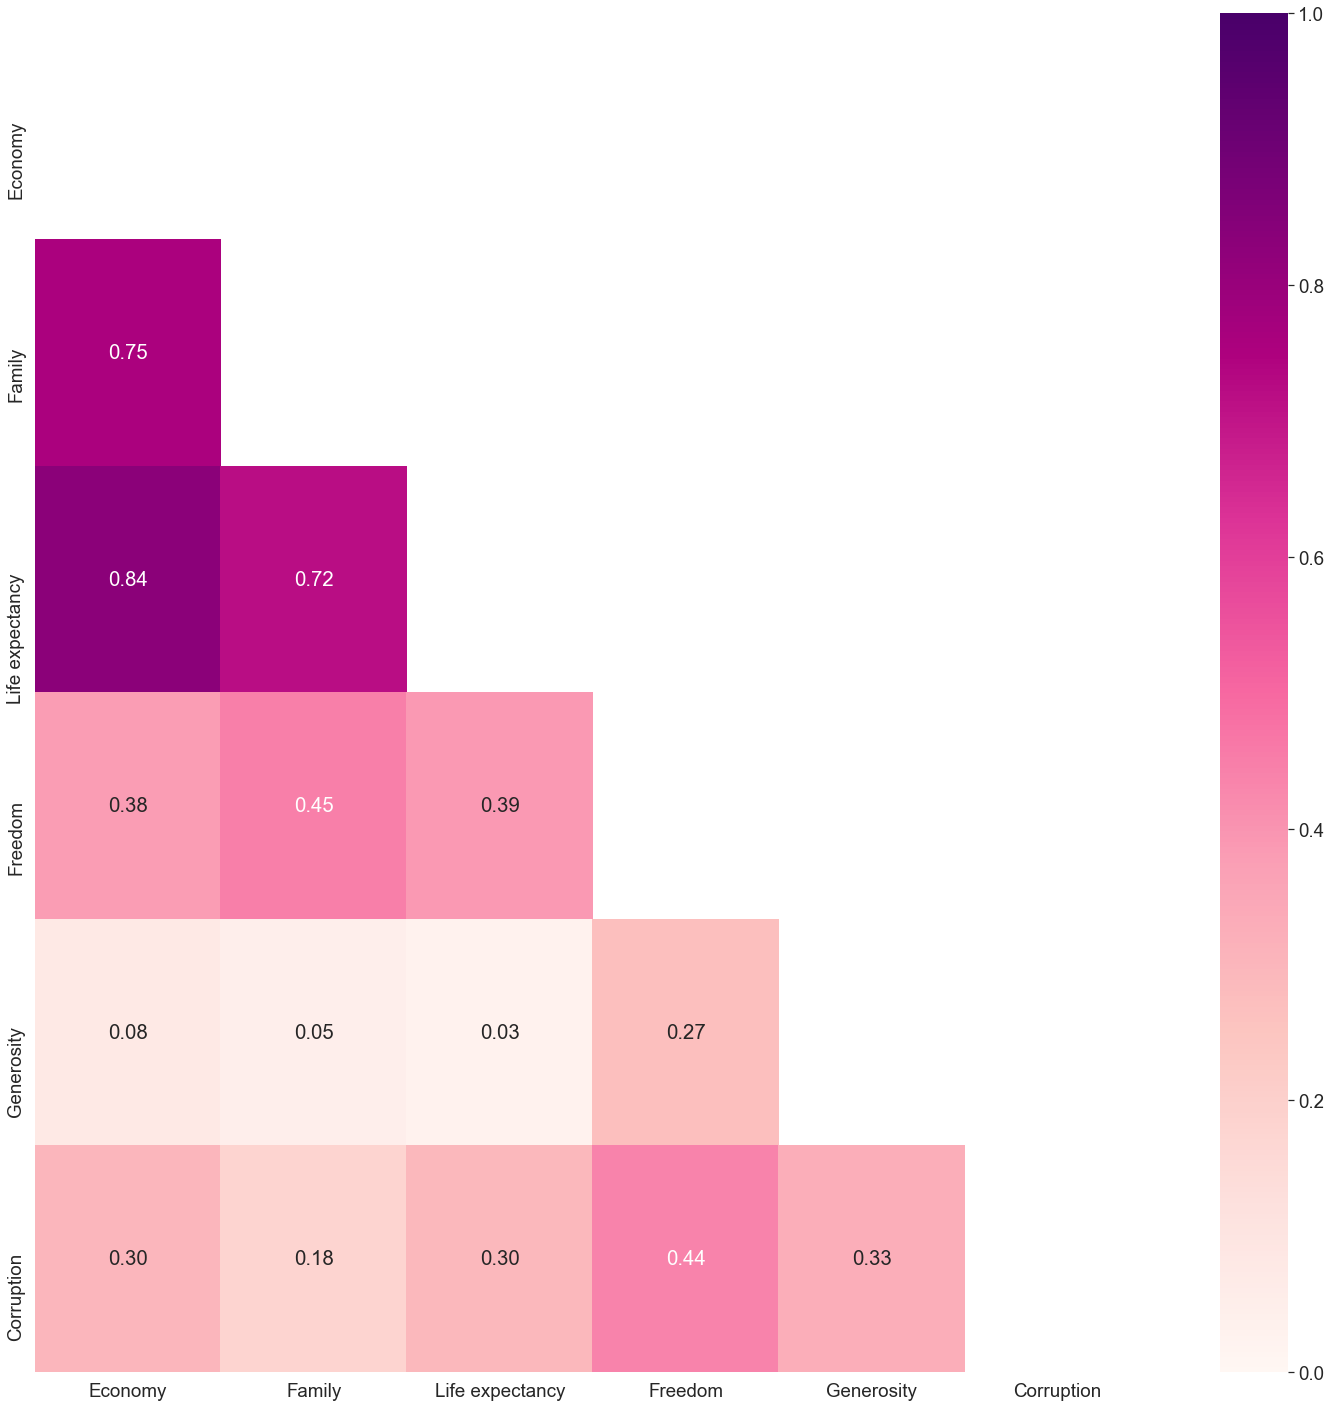

In [7]:
columns = ['Economy', 'Family', 'Life expectancy', 'Freedom', 'Generosity', 'Corruption', 'Happiness score', 'Continent']
filteredDF = df[columns]

columns = ['Economy', 'Family', 'Life expectancy', 'Freedom', 'Generosity', 'Corruption', 'Continent']
heatmapDF = df[columns]

sb.set(font_scale=1.7)
mask = np.zeros_like(heatmapDF.corr().abs())
mask[np.triu_indices_from(mask)] = True
with sb.axes_style("white"):
    f, axes = plt.subplots(1, 1, figsize=(25, 25))
    sb_heatmap = sb.heatmap(heatmapDF.corr().abs(), vmin = 0, vmax = 1, annot = True, fmt = ".2f", cmap="RdPu", cbar=True, mask=mask)

### Heatmap by Continents

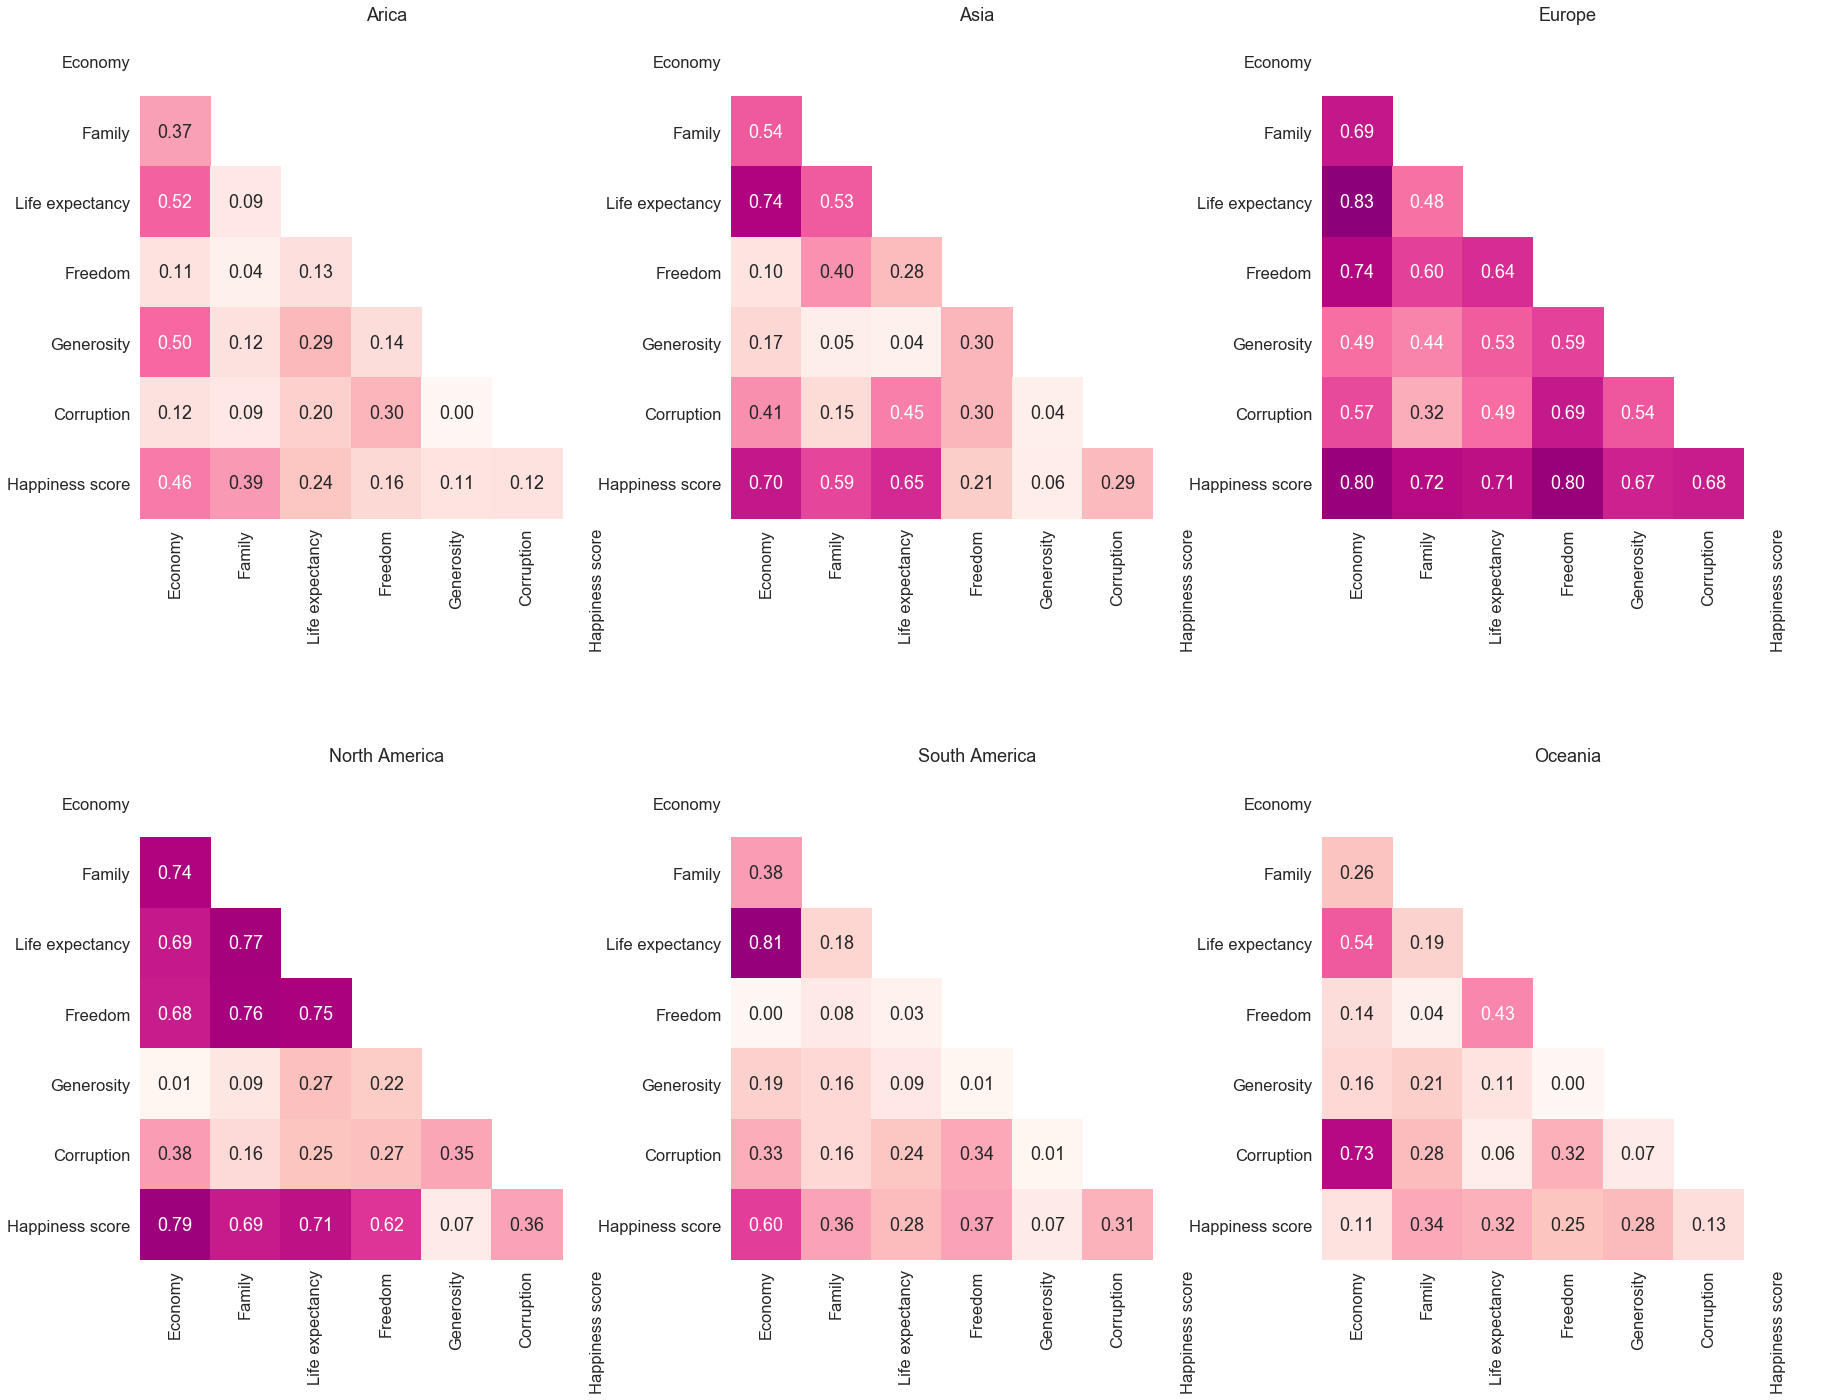

In [8]:
filteredDF = histDF[['Economy', 'Family', 'Life expectancy', 'Freedom', 'Generosity', 'Corruption', 'Happiness score', 'Continent']]

filteredDF.set_index = 'Country'

sb.set(font_scale=1.5)
mask = np.zeros_like(filteredDF.corr().abs())
mask[np.triu_indices_from(mask)] = True
sb.set_style("white")
f, axes = plt.subplots(2, 3, figsize=(30, 25))

continentDF = filteredDF[filteredDF['Continent'] == 'Africa']
sb_heatmap = sb.heatmap(continentDF.corr().abs(), vmin = 0, vmax = 1, annot = True, fmt = ".2f", cmap="RdPu", cbar=False, mask=mask, ax = axes[0,0], square=True)
axes[0,0].set_title("Arica")

continentDF = filteredDF[filteredDF['Continent'] == 'Asia']
sb_heatmap = sb.heatmap(continentDF.corr().abs(), vmin = 0, vmax = 1, annot = True, fmt = ".2f", cmap="RdPu", cbar=False, mask=mask, ax = axes[0,1], square=True)
axes[0,1].set_title("Asia")

continentDF = filteredDF[filteredDF['Continent'] == 'Europe']
sb_heatmap = sb.heatmap(continentDF.corr().abs(), vmin = 0, vmax = 1, annot = True, fmt = ".2f", cmap="RdPu", cbar=False, mask=mask, ax = axes[0,2], square=True)
axes[0,2].set_title("Europe")

continentDF = filteredDF[filteredDF['Continent'] == 'North America']
sb_heatmap = sb.heatmap(continentDF.corr().abs(), vmin = 0, vmax = 1, annot = True, fmt = ".2f", cmap="RdPu", cbar=False, mask=mask, ax = axes[1,0], square=True)
axes[1,0].set_title("North America")

continentDF = filteredDF[filteredDF['Continent'] == 'South America']
sb_heatmap = sb.heatmap(continentDF.corr().abs(), vmin = 0, vmax = 1, annot = True, fmt = ".2f", cmap="RdPu", cbar=False, mask=mask, ax = axes[1,1], square=True)
axes[1,1].set_title("South America")

continentDF = filteredDF[filteredDF['Continent'] == 'Oceania']
sb_heatmap = sb.heatmap(continentDF.corr().abs(), vmin = 0, vmax = 1, annot = True, fmt = ".2f", cmap="RdPu", cbar=False, mask=mask, ax = axes[1,2], square=True)
axes[1,2].set_title("Oceania")

### Grouped Pair Plot
_Pair plot of variables with a strong correlation_

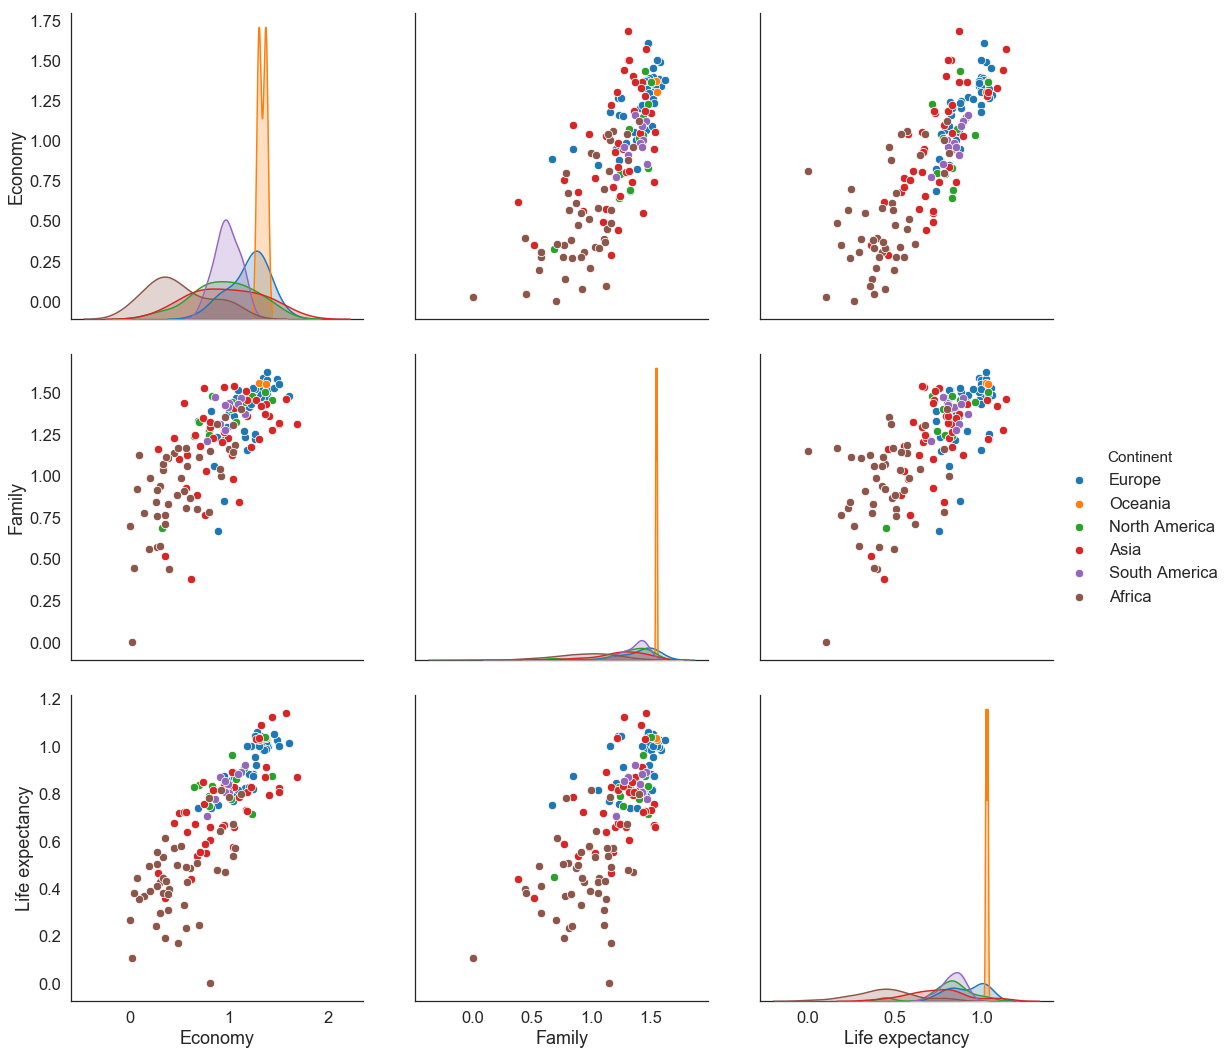

In [9]:
sb.set_style("white")
pairplot = sb.pairplot(data = heatmapDF[['Economy', 'Family', 'Life expectancy', 'Continent']], hue='Continent', height=5, plot_kws={"s": 70}, palette='tab10')

### Boxplot
_Viewing the spread of happiness scores across the different continents_

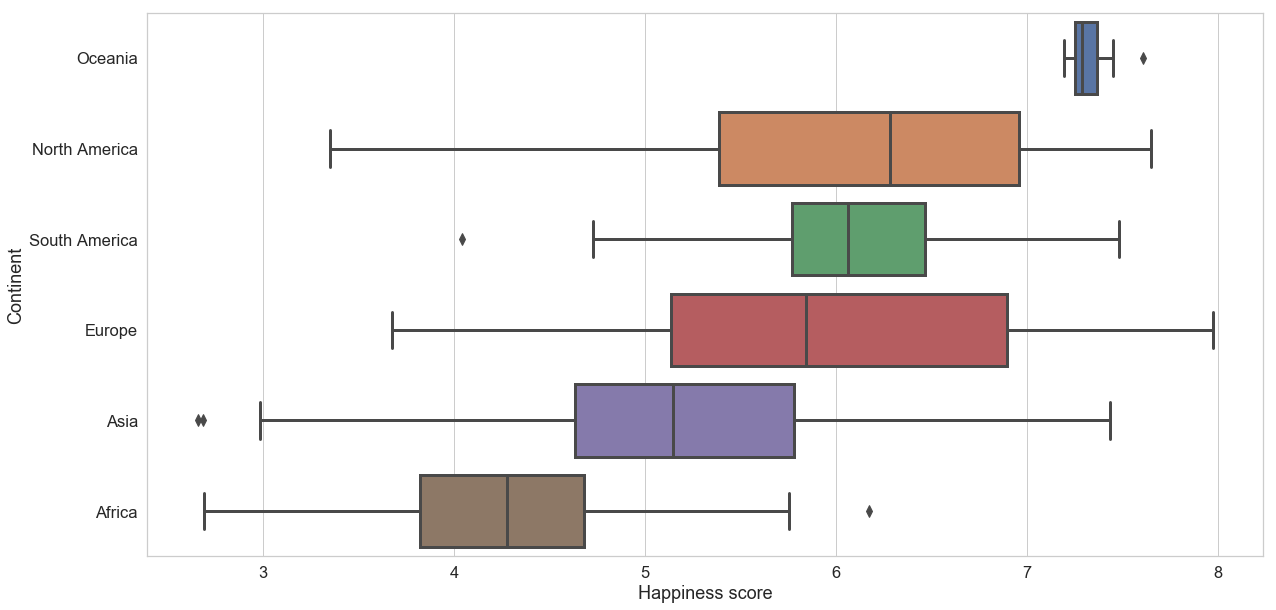

In [10]:
sb.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
boxplot = sb.boxplot(x='Happiness score', y='Continent', data=filteredDF, order=['Oceania', 'North America', 'South America', 'Europe', 'Asia', 'Africa'], linewidth=3, fliersize=8)

# Data Visualisation

### World Map of Happiness Scores

In [11]:
data = [go.Choropleth(
    locations = df['Country Code'],
    z = df['Happiness score'],
    text = df['Country'],
    colorscale='Viridis',
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 0.2
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '',
        title = 'Happiness Score'),
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'World Happiness 2018'
    ),
    geo = go.layout.Geo(
        landcolor = 'lightgray',
        showland = True,
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    )
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-chloropeth-map')

### World Map of Changes in Happiness Scores

In [12]:
data = [go.Choropleth(
    locations = change['Country Code'],
    z = change['Changes in happiness scores'],
    text = change['Country'],
    colorscale="Bluered",
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 0.2
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '',
        title = 'Change in Happiness Scores'),
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Changes in World Happines (2008-2017)'
    ),
    geo = go.layout.Geo(
        landcolor = 'lightgray',
        showland = True,
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    )
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-chloropeth-map')

# Linear Regression with Polynomial Features

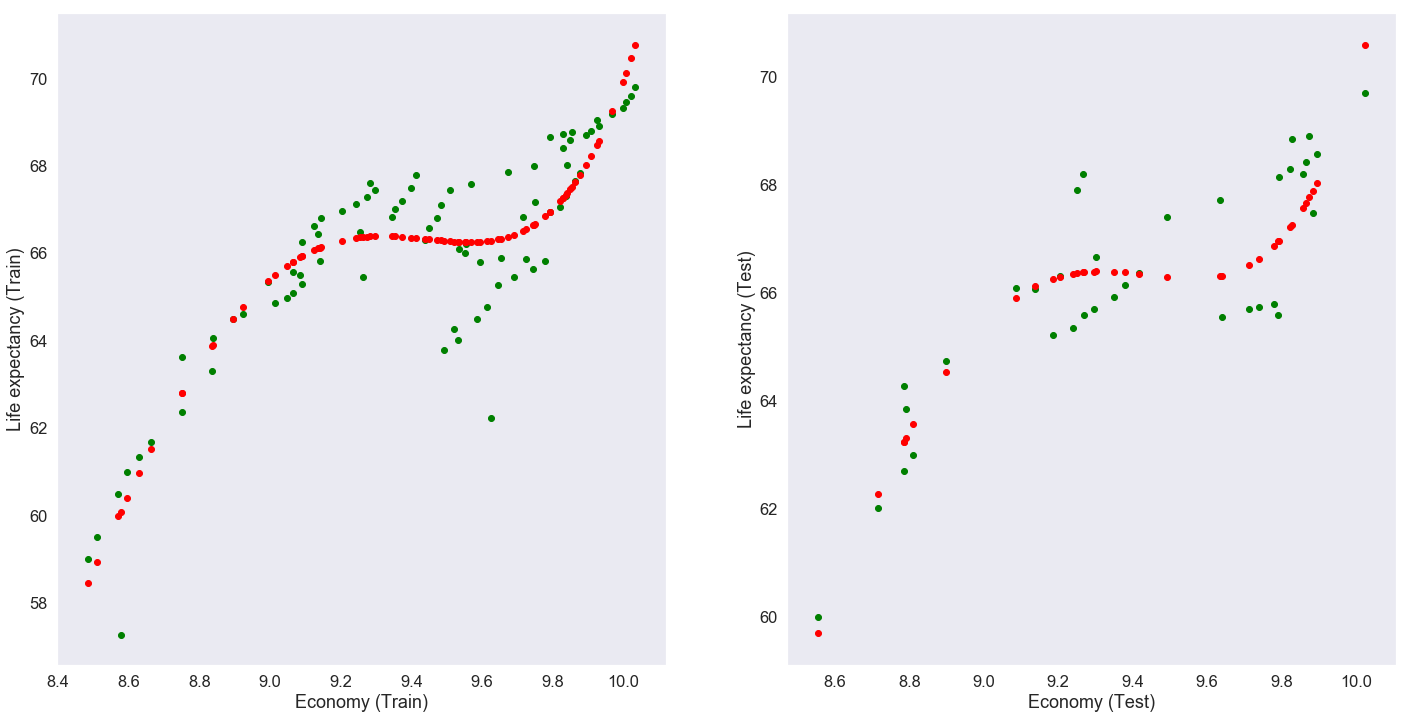

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.828160998361
Mean Squared Error (MSE) 	: 1.05586525845

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.817526215972
Mean Squared Error (MSE) 	: 0.787086841775


In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy.polynomial.polynomial import polyfit

econLeDF = filteredDF[filteredDF['Continent'] == 'South America']
econLeDF = econLeDF[['Economy', 'Life expectancy']]
split_size = 0.3

X = pd.DataFrame(econLeDF.iloc[:,0:1].values)
y = pd.DataFrame(econLeDF.iloc[:,1].values)

X_train, X_test,y_train,y_test= train_test_split(X, y, test_size = split_size)

poly = PolynomialFeatures(degree=4)
poly_x = poly.fit_transform(X_train)
linreg = LinearRegression()
linreg.fit(poly_x, y_train)
y_pred_train = linreg.predict(poly.fit_transform(X_train))
y_pred_test = linreg.predict(poly.fit_transform(X_test))

sb.set_style("dark")
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(X_train, y_train, color='green')
axes[0].scatter(X_train, y_pred_train, color='red')
axes[0].set_xlabel("Economy (Train)")
axes[0].set_ylabel("Life expectancy (Train)")
axes[1].scatter(X_test, y_test,color='green')
axes[1].scatter(X_test, y_pred_test,color='red')
axes[1].set_xlabel("Economy (Test)")
axes[1].set_ylabel("Life expectancy (Test)")

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(poly.fit_transform(X_train), y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_pred_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(poly.fit_transform(X_test), y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_pred_test))

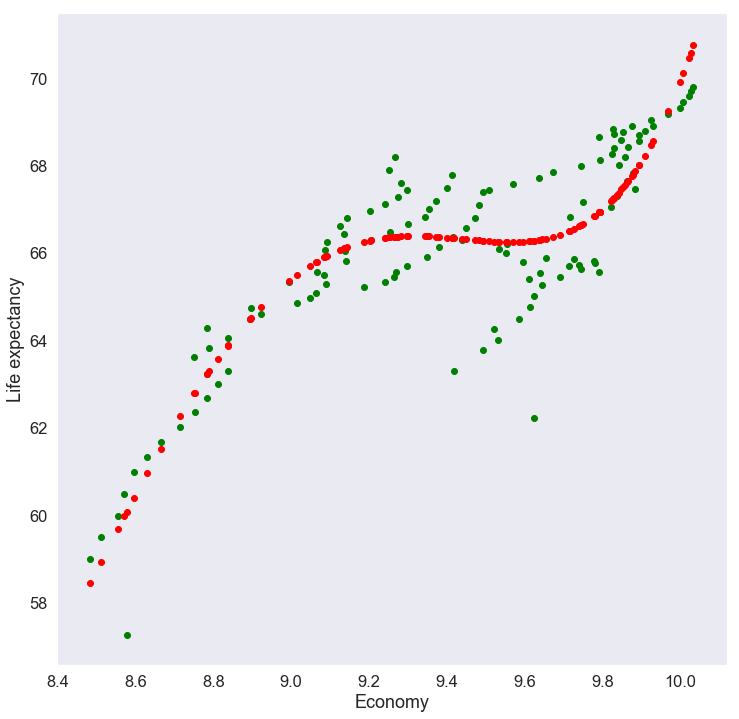

Goodness of Fit of Model 	2018 Dataset
Explained Variance (R^2) 	: 0.810884480556
Mean Squared Error (MSE) 	: 1.04606671644



In [14]:
df_2018_2 = df_2018[df_2018['Continent'] == 'South America']
df_2018_2 = df_2018_2[['Economy', 'Life expectancy']]
df_2018_2 = df_2018_2.dropna(how='any',axis=0)

X = pd.DataFrame(df_2018_2.iloc[:,0:1].values)
y = pd.DataFrame(df_2018_2.iloc[:,1].values)

y_pred = linreg.predict(poly.fit_transform(X))

sb.set_style("dark")
f, axes = plt.subplots(1, 1, figsize=(12, 12))
plt.scatter(X, y, color='green')
plt.scatter(X, y_pred, color='red')
axes.set_xlabel("Economy")
axes.set_ylabel("Life expectancy")

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \t2018 Dataset")
print("Explained Variance (R^2) \t:", linreg.score(poly.fit_transform(X), y))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y, y_pred))
print()

### Computing Confidence Intervals of Trained Model

In [15]:
y_pred = linreg.predict(poly.fit_transform(X_train))
y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index=X_train.index)
econLe_acc = pd.concat([X_train, y_train, y_pred], axis = 1)
econLe_acc.rename(columns={ econLe_acc.columns[0]: "Economy", econLe_acc.columns[1]: "Life expectancy"})
econLe_acc.columns = ['Economy', 'Life expectancy', 'PredTotal']

y_errs = 100 * abs(econLe_acc["Life expectancy"] - econLe_acc["PredTotal"]) / econLe_acc["Life expectancy"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = X_train.index)
econLe_acc = pd.concat([econLe_acc, y_errs], axis = 1)

MSE_train = mean_squared_error(y_train, y_pred_train)
StdE_pred = np.sqrt(len(y_train) * MSE_train/(len(y_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))
y_95l = pd.DataFrame(econLe_acc["PredTotal"] - 1.96*StdE_pred).rename(columns = {"PredTotal" : "95 Lower"})
y_95u = pd.DataFrame(econLe_acc["PredTotal"] + 1.96*StdE_pred).rename(columns = {"PredTotal" : "95 Upper"})
y_99l = pd.DataFrame(econLe_acc["PredTotal"] - 2.58*StdE_pred).rename(columns = {"PredTotal" : "99 Lower"})
y_99u = pd.DataFrame(econLe_acc["PredTotal"] + 2.58*StdE_pred).rename(columns = {"PredTotal" : "99 Upper"})

errorDF = pd.concat([econLe_acc, y_95l, y_95u, y_99l, y_99u], axis = 1)
errorDF.head()

Mean Squared Error (MSE) 	: 1.06
Pred Standard Error (SE) 	: 1.04


,Economy,Life expectancy,PredTotal,Error,95 Lower,95 Upper,99 Lower,99 Upper
59,9.091516,66.260002,65.931330,0.496033,63.892614,67.970047,63.247714,68.614947
3,9.750825,67.180000,66.678419,0.746623,64.639703,68.717136,63.994802,69.362036
27,9.584492,64.500000,66.258376,2.726165,64.219660,68.297093,63.574760,68.941993
2,9.822107,67.059998,67.193446,0.198999,65.154730,69.232163,64.509830,69.877063
75,8.894192,64.500000,64.498821,0.001827,62.460105,66.537538,61.815205,67.182438


### Africa vs Ebola

In [16]:
ebola_cases = pd.read_csv("Datasets/ebola_data_db_format.csv")
ebola_cases = ebola_cases[ebola_cases['Indicator'] == 'Cumulative number of confirmed Ebola cases']
ebola_cases = ebola_cases[['Country', 'Date', 'value']]
ebola_cases = ebola_cases[(ebola_cases['Country'] != 'United States of America') & (ebola_cases['Country'] != 'Liberia 2') & (ebola_cases['Country'] != 'Guinea 2')]

continents = []
countryCodes = []

for row in ebola_cases['Country']:
    continents.append(continentCodes.loc[row, 'Continent'])

for row in ebola_cases['Country']:
    countryCodes.append(codes.loc[row, 'CODE'])

ebola_cases['Continent'] = continents
ebola_cases['Country Code'] = countryCodes

ebola_cases = ebola_cases[ebola_cases['Continent'] == 'Africa']

ebola_cases['Date'] = ebola_cases['Date'].apply(pd.to_datetime)
ebola_cases['Date'] = pd.DatetimeIndex(ebola_cases['Date'])

ebl = []
for country in ebola_cases.Country.unique():
    ebolaCountryDF = ebola_cases[ebola_cases['Country'] == country]
    for year in [2014,2015,2016]:
        ebolaYearDF = ebolaCountryDF[pd.DatetimeIndex(ebolaCountryDF['Date']).year == year]
        cases = ebolaYearDF['value'].mean()
        ebl.append([country, ebolaCountryDF['Country Code'].iloc[0], year, cases])
        
ebolaCases = pd.DataFrame(ebl, columns=['Country', 'Country Code', 'Year', 'Cases'])

ebolaCases.head()

,Country,Country Code,Year,Cases
0,Guinea,GIN,2014,1481.447368
1,Guinea,GIN,2015,3136.254545
2,Guinea,GIN,2016,3351.000000
3,Liberia,LBR,2014,1952.810811
4,Liberia,LBR,2015,3148.518182


In [17]:
histDF.head()

,Economy,Family,Life expectancy,Freedom,Generosity,Corruption,Happiness score,Continent,Year,Country
0,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,3.723590,Asia,2008,Afghanistan
1,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,4.401778,Asia,2009,Afghanistan
2,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,4.758381,Asia,2010,Afghanistan
3,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,3.831719,Asia,2011,Afghanistan
4,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,3.782938,Asia,2012,Afghanistan


In [18]:
dataframe = []
data = []
colors = ['rgb(220, 20, 60)',
         'rgb(255, 140, 0)',
         'rgb(255, 215, 0)',
         'rgb(50, 205, 50)',
         'rgb(30, 144, 255)',
         'rgb(138, 43, 226)']

i=0

for country in ['Guinea', 'Liberia', 'Sierra Leone']:
    countryEbolaCases = ebolaCases[ebolaCases['Country'] == country]
    countryHistDF = histDF[(histDF['Year'] > 2013) & (histDF['Year'] < 2017)]
    countryHistDF = countryHistDF[countryHistDF['Country'] == country]
    
    countryEbolaCases = countryEbolaCases.groupby(['Country', 'Year'], as_index=False).sum()
    countryHistDF = countryHistDF.groupby(['Country', 'Year'], as_index=False).sum()

    countryHistDF = countryHistDF[['Country', 'Year', 'Happiness score']]
    countryEbolaCases = countryEbolaCases[['Country', 'Year', 'Cases']]

    countryEbolaCases['Happiness score'] = countryHistDF['Happiness score']
    
    trace0 = go.Scatter(
        x = countryEbolaCases['Cases'],
        y = countryEbolaCases['Happiness score'],
        name = country,
        mode = 'lines+markers',
        line = dict(
            color = colors[i],
            width = 4)
    )
    data.append(trace0)
    i += 1
    
# Edit the layout
layout = dict(title = '# of Confirmed Cases vs Happiness Score',
              xaxis = dict(title = 'Cases'),
              yaxis = dict(title = 'Happiness Score'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='line-mode')

### Haiti vs Natural Disasters

In [19]:
# 2019 Happiness report
df2019_1=pd.read_excel("Datasets/WHR2019Chapter2OnlineData.xls", sheetname='Table2.1')
df2019_6=pd.read_excel("Datasets/WHR2019Chapter2OnlineData.xls", sheetname='Figure2.6')

# 2018 Happiness report
df2018_2=pd.read_excel("Datasets/WHR2018Chapter2OnlineData.xls", sheetname='Figure2.2')
# 2017 Happiness report
df2017_2=pd.read_excel("Datasets/WHR2017Chapter2OnlineData.xlsx", sheetname='Figure2.2 WHR 2017')
# 2016 Happiness report
df2016_2=pd.read_excel("Datasets/WHR2016Chapter2OnlineData.xlsx", sheetname='Figure2.2')

# get happiness score of haiti from 2014 to 2018
score_2014=4.518 # extracted from world happiness report 2015, pg 28
data={'Year':['2014'], 'Happiness score':[score_2014], 'Country':['Haiti']}
score_2014=pd.DataFrame.from_dict(data)
score_2015=pd.DataFrame(df2016_2[df2016_2['Country']=='Haiti'])
score_2015.insert(0,column='Year', value='2015')
score_2016=pd.DataFrame(df2017_2[df2017_2['Country']=='Haiti'])
score_2016.insert(0,column='Year', value='2016')
score_2017=pd.DataFrame(df2018_2[df2018_2['Country']=='Haiti'])
score_2017.insert(0,column='Year', value='2017')
score_2018=pd.DataFrame(df2019_6[df2019_6['Country']=='Haiti'])
# score_2018.insert(0,column='Year', value='2018')

# INFORM INDEX Report
df2=pd.read_excel('Datasets/INFORM_2016.xlsx', sheetname='Indicator Data')
df1=pd.read_excel('Datasets/INFORM_2017.xlsx', sheetname='Indicator Data')
df=pd.read_excel('Datasets/INFORM_2019.xlsx',sheetname='Indicator Data')
# Extract the haiti data
haiti_2016=pd.DataFrame(df2[df2['COUNTRY']=='Haiti'])
haiti_2017=pd.DataFrame(df1[df1['COUNTRY']=='Haiti'])
haiti_2019=pd.DataFrame(df[df['COUNTRY']=='Haiti'])

# Extract the data on the number of people affected by natural disaster in Haiti in 2014
ND2=pd.DataFrame(haiti_2016[['People affected by Natural Disasters.1']])
ND2.rename(index={72:'Number of people affected by Natural Disasters in Haiti'}, inplace=True)
ND2.rename(columns={'People affected by Natural Disasters.1':'2014'}, \
           inplace=True)
ND2=ND2.transpose()

# Extract the data on the number of people affected by natural disaster in Haiti in 2015
ND1=pd.DataFrame(haiti_2017[['People affected by Natural Disasters.2']])
ND1.rename(index={72:'Number of people affected by Natural Disasters in Haiti'}, inplace=True)
ND1.rename(columns={'People affected by Natural Disasters.2':'2015'}, inplace=True)
ND1=ND1.transpose()

# Extract the data on the number of people affected by natural disaster in Haiti in 2016, 2017, 2018
ND=pd.DataFrame(haiti_2019[['People affected by Natural Disasters','People affected by Natural Disasters.1',\
                           'People affected by Natural Disasters.2']])
ND.rename(index={9:'Number of people affected by Natural Disasters in Haiti'}, inplace=True)
ND.rename(columns={'People affected by Natural Disasters':'2016', 'People affected by Natural Disasters.1':'2017',\
              'People affected by Natural Disasters.2':'2018'}, inplace=True)
ND=ND.transpose()

# Create a DataFrame containing the years and the number of people affected by natural disaster for each year
NaturalHazard=pd.concat([ND2, ND1, ND])
NaturalHazard=NaturalHazard.reset_index()
NaturalHazard.rename(columns={'index':'Year'}, inplace=True)
NaturalHazard['Number of people affected by Natural Disasters in Haiti']=\
NaturalHazard['Number of people affected by Natural Disasters in Haiti'].astype('float64')
NaturalHazard.head()

,Year,Number of people affected by Natural Disasters in Haiti
0,2014,1098111.0
1,2015,3651280.0
2,2016,5801040.0
3,2017,90434.0
4,2018,350333.0


In [21]:
# Create dataframe of happiness score and score in of haiti from 2014 to 2018
Hpscore=pd.concat([score_2014,score_2015, score_2016, score_2017, score_2018])
Hpscore.reset_index(inplace=True, drop=True)
#Add happiness score data to natural hazard data
NaturalHazard.insert(1, column='Happiness score', value=Hpscore['Happiness score'])
NaturalHazard.head()

,Year,Happiness score,Number of people affected by Natural Disasters in Haiti
0,2014,4.5180,1098111.0
1,2015,4.0280,3651280.0
2,2016,3.6030,5801040.0
3,2017,3.5820,90434.0
4,2018,3.5969,350333.0


In [22]:
Value=[]
count=0
for i in NaturalHazard["Number of people affected by Natural Disasters in Haiti"]:
    Value.insert(count,i/1000000)
    count+=1
# Use of Plotly
# Create and style traces
trace0 = go.Scatter(
    x = NaturalHazard['Year'],
    y = NaturalHazard['Happiness score'],
    name='Happiness score',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = NaturalHazard['Year'],
    y =  Value,
    name = 'People affected by natural disasters(in Millions)',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)

data = [trace0, trace1]

# Edit the layout
layout = dict(title = 'Happiness score and Number of people affected natural disaster in Haiti',
              xaxis = dict(title = 'Year'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')